In [1]:
import matplotlib.pyplot as plt
import numpy as np

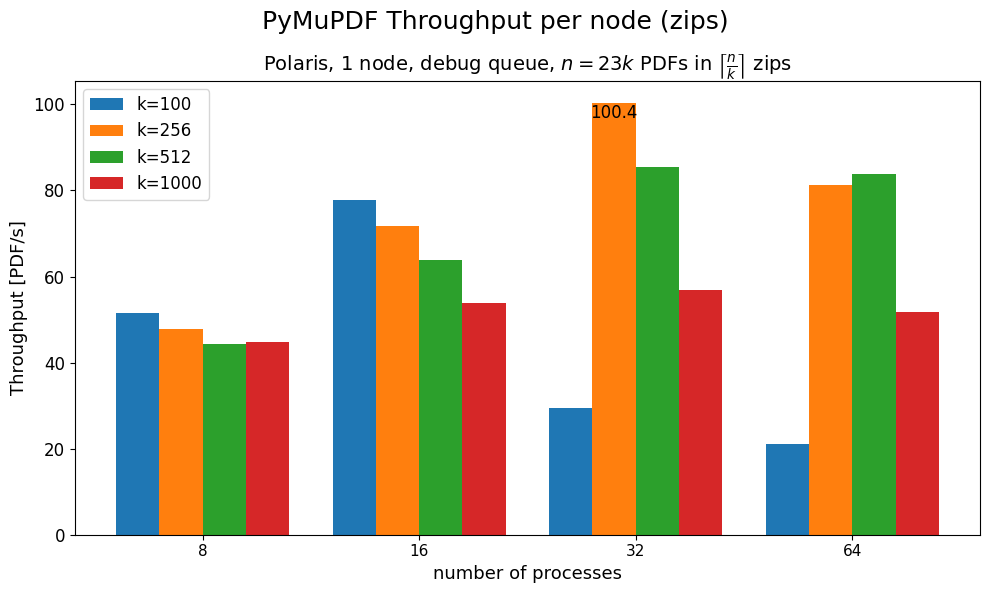

In [75]:
# Total PDFs parsed
n = 23395.

# Function to convert 'minute:seconds' to total seconds
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

n_values = np.array([8, 4, 2, 1])
thread_values = np.round(64 / n_values)
thread_values = [int(thread) for thread in thread_values]

# Data
data = {
    100: ['7:34', '5:01', '13:16', '18:25'],
    256: ['8:10', '5:26', '3:53', '4:48'],
    512: ['8:49', '6:07', '4:34', '4:39'],
    1000: ['8:42', '7:15', '6:52', '7:33']
}

# Indexes for n
n_values = [8, 4, 2, 1]

# Convert all times to seconds
data_in_seconds = {k: [(n / convert_to_seconds(time)) for time in times] for k, times in data.items()}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('PyMuPDF Throughput per node (zips)', fontsize=18)

bar_width = 0.2
index = np.arange(len(thread_values))

for i, (k, times) in enumerate(data_in_seconds.items()):
    ax.bar(index + i * bar_width, times, bar_width, label=f'k={k}')

# Labels and Title
ax.set_xlabel('number of processes', fontsize=13)
ax.set_ylabel('Throughput [PDF/s]', fontsize=13)
ax.set_title(r'Polaris, 1 node, debug queue, $n=23k$ PDFs in $\left\lceil \frac{n}{k} \right\rceil$ zips', fontsize=14)
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(thread_values, fontsize=11)
ax.legend(fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding the dashed parallel line at y=100 centered at x=32
x_center = 2.2
x_start = x_center - 0.2  # Starting x position (length of 2 centered at x=32)
x_end = x_center + 0.2    # Ending x position
#ax.plot([x_start, x_end], [100, 100], linestyle='--', color='black')

# add text
ax.text(.595, 0.93, '100.4', ha='center', va='center', color='black', transform=ax.transAxes, fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


In [55]:
23395. / (3 * 60 + 53)

100.4077253218884